#### Topic: Hw7, Machine-Learning-2019-fall
#### Date: 2019-12-23
#### Author: 林俊儒(B063040058), 王譽鈞(B065040034)
---
#### 題目說明：使用 Q-Learning 訓練
#### 能夠在 OpenAI Gym FrozenLake-v0 的環境中成功達成任務的 Agent。

In [1]:
import gym
import numpy as np
import time, os
from matplotlib import pyplot as plt

#### 先宣告 agent 需要的 class: RL_Q_learning 
##### =>  epsilon = 0.9
##### =>  learning rate = 0.81
##### =>  gamma = 0.96
---
#### 使用 start() 這個 function 時
#### 會訓練我們的 agent 跑10000次 
#### 訓練時 close_epsilon=False
##### (如果想要的話) 可以另外把訓練完的 Q-table 
##### 透過 pickle 存起來( 包在 .save_Qdata()這個function )

In [4]:
import pickle
class RL_Q_learning():
    def __init__(self):
        print('Agent created') 
    
    def start(self):
        self.epsilon = 0.9
        self.lr_rate = 0.81
        self.gamma = 0.96
        
        self.env = gym.make('FrozenLake-v0', is_slippery=True)
        self.Q = np.zeros((self.env.observation_space.n, self.env.action_space.n))
        self.per_episode_reward_list = []
        self.accumulate_reward_list = []
        self.accumulate_episode_list = []
        
        print("")
        print("使用的超參數:")
        print("epsilon =", self.epsilon)
        print("learning rate =", self.lr_rate)
        print("gamma =", self.gamma)
        print("")
        
        print("Original Q-table:")
        self.show_Q()
        print("")
        
        success_state = 15
        succ_count = 0;
        fail_count = 0;
        total_train_episodes = 10000
        max_try_steps = 200
        total_score = 0
        
        # Start train
        for episode in range(total_train_episodes):
            
            state = self.env.reset()
            try_step = 0
            episode_reward = 0
            
            while try_step < max_try_steps:
                
                action = self.take_action(state, close_epsilon=False)
                next_state, reward, done, info = self.env.step(action)
                self.learn(state, next_state, reward, action)
                state = next_state
                
                episode_reward += reward
                if state==success_state: succ_count += 1
                if done: break

            total_score += episode_reward
            if state!=success_state: fail_count += 1
            
            self.per_episode_reward_list.append(episode_reward)
            self.accumulate_reward_list.append(total_score)
            self.accumulate_episode_list.append(episode)
        # Finish train
        
        print("After-train Q-table:")
        self.show_Q()
        print("")
        
        print("----------------------------------")
        print("total train episodes: 10000")
        print("success times:", succ_count)
        print("fail    times:", fail_count)
        print("----------------------------------")
        print("")
        
        print("每一個 Episode 的 Reward (題目定義只有0和1兩種reward):")
        plt.xlabel('each <Episode>')
        plt.ylabel('each <Reward>')
        plt.title('Each rewards per episode ')
        plt.plot(self.accumulate_episode_list, self.per_episode_reward_list, color='r',label = 'per_episode reward')
        plt.legend()
        plt.show()
        print("")
        
        print("隨著 Episode 增加累積的 Reward:")
        plt.xlabel('accumulated <Episode>')
        plt.ylabel('accumulated <Reward>')
        plt.title('Total rewards change with episode')
        plt.plot(self.accumulate_episode_list, self.accumulate_reward_list, color='b',label = 'accumulated reward')
        plt.legend()
        plt.show()
        print("")
        
        print("以上是start()裡面會印的")
        print("==================================")
        print("")
                
    def take_action(self, state, close_epsilon):
        action = 0
        if (not close_epsilon) and (np.random.uniform(0, 1) < self.epsilon):  #choose random action
            action = self.env.action_space.sample()
        else:
            action = np.argmax(self.Q[state, :])
        return action

    def learn(self, state, next_state, reward, action):
        predict = self.Q[state, action]
        target = reward + self.gamma * np.max(self.Q[next_state, :])
        self.Q[state, action] = self.Q[state, action] + self.lr_rate * (target - predict)
    
    def load_Qdata(self):
        with open("frozenLake_qTable.pkl", 'rb') as f:
            self.Q = pickle.load(f)
    
    def save_Qdata(self):
        with open("frozenLake_qTable.pkl", 'wb') as f:
            pickle.dump(self.Q, f)
        
    def show_Q(self):
        print(self.Q)

---
##### 我們自己測試時 train 完的 Q-table
##### 以及藉由這個 Q-table 畫出來的 各格 移動路徑

<img src="https://i.imgur.com/iG1FMj3.jpg" width="60%"/>

<img src="https://i.imgur.com/zcA0BJK.png" width="50%"/>

---
#### 使用作業要求的模板 測試我們的 agent 
#### close_epsilon = True

Agent created

使用的超參數:
epsilon = 0.9
learning rate = 0.81
gamma = 0.96

Original Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]

After-train Q-table:
[[6.64058995e-01 6.83879942e-01 5.79364983e-01 5.40638863e-01]
 [1.49914000e-04 4.28428369e-01 5.70777682e-01 5.18309195e-01]
 [5.22147847e-01 4.99970688e-01 5.40291185e-01 4.96727986e-01]
 [8.03780770e-02 4.99807861e-01 4.84599140e-01 4.97848433e-01]
 [7.46982306e-01 6.85424178e-01 1.68781552e-04 7.46455381e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [5.45032966e-01 3.22535850e-03 8.10480648e-01 1.92220692e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.12985596e-01 1.28657810e-01 8.65092101e-01 7.97638416e-01]
 [8.66052365e-01 9.03809140e-01 4.95113843e-01 8.73406560e-01]
 [9.38741114e-01 

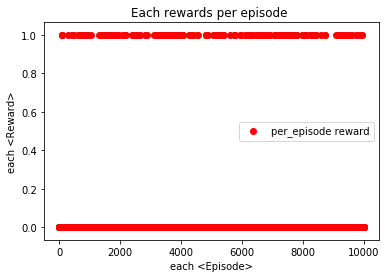


隨著 Episode 增加累積的 Reward:


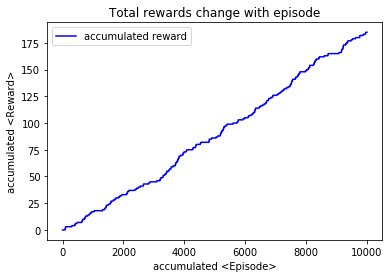


以上是start()裡面會印的

0.055
RL Hw1 step 5 Score: 7.425


In [5]:
if __name__ == '__main__':
    agent = RL_Q_learning()
    agent.start()

    import gym
    env = gym.make('FrozenLake-v0')
    __score = 0
    for i in range(1000):
        total_reward = 0
        state = env.reset()
        while True:
            action = agent.take_action(state, close_epsilon=True)
            next_state, reward, done, _ = env.step(action)
            state = next_state
            total_reward += reward
            if done:
                break
        __score += total_reward
    __score /= 1000
    print(__score)
    print("RL Hw1 step 5 Score:", min(__score * 135, 100))

---
##### 可以看到因為在冰塊上行走時，
##### 只有僅僅 1/3 的機率 會真的照想走的方向走
##### 因此 1. 即使 Q-table 逐漸成型，成功率(累積的reward數)並沒有快速上升(斜率沒有變大)
##### 同時 2. 因為有可能往左右滑，所以在洞旁邊時的策略基本上都背對洞走